# Simulated example of particle counting problem
Isabelle Guyon, July 2021-April 2023

### Problem setting

Collisions occuring in the LHC yield **low energy** and **high energy events**, the latter occuring rarely and being the events of interest. The occurrence of **high energy events is modeled by a Poisson process of know arrival rate expectation $\nu$** (which can be interpreted as the mean number of high energy events per experiment carried out). Among high energy events, physicists search for interesting events might that give them some information about possible new discoveries. Most of the events seen are "background", events that are expected and unrelated to new physics. The intereting "signal" events are far less frequently seen. Background events are well characterized from past experiments and simulation. The "known" **arrival rate expectation of background events is called** $\beta$. The arrival rate expectation of signal events is to be measured. It is denoted as $\mu \gamma$, where $\gamma$ is the estimated arrival rate expectation of signal events obtained from the Standard Model (SM, our current theoretical model to describe particle physics, which is known to be incomplete), and $~~~\mu$ **is a "signal strength" factor, which we must evaluate from the new experiment at hand**. 


### Poisson counting process (no systematics)

The three arrival processes (high energy events, signal, and background) are all assumed to be Poisson processes and their arrival rate expectations are linked by the equation: $\nu = \beta + \mu \gamma$.

A baseline method for the estimation of $\mu$ consists in using a maximum likelihood estimator simply based on the Poisson process modeling, yielding:

$\Large \hat{\mu} = \frac{N - \beta}{\gamma}~~~~~~~(1)$

where $N \sim Poisson(\nu)$ is a random variable: the observed number of high energy events in an experiment. 

Another problem of interest is to estimate the error bar of $\hat{\mu}$. The variance of the estimator [can be calculated in closed form](https://www.overleaf.com/read/kwyqrqdpsgrv
), yielding:

$\Large \sigma^2_{\hat{\mu}} = \frac{\nu}{\gamma^2} = \frac{\mu \gamma + \beta}{\gamma^2}$   

In this formula we assume $\gamma$ and $\beta$ are known constant, but we have the unknown $\mu$. In practice we may want to use the estimator:

$\Large \hat{\sigma}^2_{\hat{\mu}} = \frac{\hat{\mu} \gamma + \beta}{\gamma^2}$

This estimator can be re-written as $\hat{\sigma}^2_{\hat{\mu}} = \frac{1}{\gamma}\hat{\mu}  + \frac{\beta}{\gamma^2}$, which shows that the estimated variance is a linear function of $\hat{\mu}$. But, since $\hat{\mu} \gamma \ll \beta$, in practice 

$\Large \hat{\sigma}^2_{\hat{\mu}} \simeq \frac{\beta}{\gamma^2}$.


### Use of the observation of the collision fireworks (still no systematics)
Each collision event results in a big fireworks, a snapshot of it is taken on the detectors of the LHC. After some preprocessing and pre-filtering of events, a feature vector $\bf x$ (signature) is extracted. Such feature vector can be used to "recognize" background events and "signal" events. However, the signatures of signal and some background events closely resemble each others. In other words the distributions overlap. Furthermore, there are very few signals compared to the number of backgrounds. Thus, there is no real hope to very accurately classify events. Since all we want is to estimate $\mu$, classifying accurately signals and backgrounds may not actually be necessary. Two methods for extimating $\mu$ are commonly used by physicists:

1. **Histogram method:** Projecting $\bf x$ onto **one single feature**, constructed from $x$ in a smart way (usually from expert knowledge); create a histogram of events in that 1-dimensional projection (i.e. bin the events); apply formula (1) in each bin. Carrying out this method relies on the fact that $\mu$ can be estimated in each bin because $\Large \mu = \frac{\nu_i - \beta_i}{\gamma_i} = \frac{\nu - \beta}{\gamma}$, where $\beta_i$ and $\gamma_i$ are the SM expected values of background and signal events in each bin, which can be obtained by extensive Monte Carlo simulations using an accurate simulator of the data generating process, for $\mu=1$. This can yield an estimator of $\mu$:

$\Large \hat{\mu} = \sum_{i=1}^m w_i \frac{N_i - \beta_i}{\gamma_i}$
[It can be shown](https://www.overleaf.com/read/kwyqrqdpsgrv
) that this estimator has a lower variance than that of the plain Poisson counting process of the previous section: 
$\Large \sigma^2_{\hat{\mu}} \simeq \left( \sum_{i=1}^m \frac{\gamma_i^2}{\nu_i}\right)^{-1}$ 

Here, $\gamma_i$ and $\beta_i$ are generally NOT assumed to be known constants, only $\gamma$ and $\beta$ are. They must be estimated in each bin, e.g., using a simulator (which can be rather precise since we can generate a lot of data from the simulator). However, in the presence of systematics, the estimation will be biased. A re-estimation hypothesizing a given systematic error will be needed.

2. **Classifier method:** Norrowing down the number of events to be considered to a Region Of Interest (ROI), rich in signal events, putting a threshold on the output of a classifier providing $Proba(y=signal|{\bf x})$, then apply the estimator:

$\Large \hat{\mu} = \frac{N_{ROI} - \beta_{ROI}}{\gamma_{ROI}}$

This estimator has variance:

$\Large \sigma^2_{\hat{\mu}} = \frac{\nu_{ROI}}{\gamma_{ROI}^2} $

which is lower than that of the plain Poisson counting process, iff  $\gamma_{ROI} \cdot \gamma_{ROI}/\nu_{ROI} > \gamma \cdot \gamma/\nu$. We see that $\gamma_{ROI}/\nu_{ROI}>\gamma/\nu$ is NOT a sufficient condition to lower the variance of the estimator of $\mu$. There is a tradeoff between increasing $\gamma_{ROI}/\nu_{ROI}$ and not decreasing $\gamma_{ROI}$ too much, that is going into regions "enriched" in signal, but in which the total number of signal events approaches 0.

Here $\gamma_{ROI}$ and $\beta_{ROI}$ are NOT assumed to be known constants (like in the histogram method); they need to be estimated with the simulator, and, likewise, could be plagued with systematic error. Thus, in the presence of systematics, this simple estimator under-estimates the variance of $\hat{\mu}$. **This is the problem we want to solve.**

3. **Other methods:** Those could include: 
* finding first an optimal direction of projection, e.g. with a classifier, then applying the binning method.
* computing an estimation of $\mu \gamma$ from $\sum_j P(y_j=signal|{\bf x_j})$ using the classifier but without Poisson counting; 
* estimating $\mu$ directly with a regressor. 

Note that the direct estimation of $\mu$ with a regressor means training a regressor on a meta-problem in which each data point is a dataset (a full experiment).

### "Graphical method" to estimate the variance of $\hat{\mu}$ or "inversion of the test"
If an estimator of $\mu$ is used, other than those for which the variance can be calculated in closed form, then an approximate method can be used. It boils down to a [second order Taylor series approximation of the negative log likelihood](https://drive.google.com/file/d/1A_SMH_0Eo2JTZ_sLhva2l5TEXWH3ca59/view?usp=sharing) (or energy function) near its optimum. In the viscinity of the optimum of the likelihood $L(\hat{\mu})$, we have (here $\log$ is the natural logarithm):

$\Large \log L(\mu) \simeq \log L(\hat{\mu}) - \frac{|\mu - \hat{\mu}|^2}{2 \hat{\sigma}^2_{\hat{\mu}}}$

which is the equation of a parabola. It follows that:

$\Large \log L(\hat{\mu} \pm \hat{\sigma}_{\hat{\mu}}) \simeq  \log L(\hat{\mu}) - \frac{1}{2}~~~~~~~(2)$

Thus one can just fit the experimental values of $L(\mu)$ to a parabola and, in the viscinity of the optimum, find $ L(\hat{\mu}) - 1/2$. The distance between the corresponding values of $\mu$ is then $2 \hat{\sigma}_{\hat{\mu}}$.
This boils down to giving us a 1-sigma confidence interval ($\simeq 68\%$ chance of finding the correct value in the interval). One can also get an assymmetric confidence interval, i.e. not fit the log likelihood to a parabola to obtain a lower and upper bound $\hat{\mu} = value^{+upper}_{-lower}$.

WARNING: Possible confusion. Here $\mu$ is a variable, not to be confused with the constant of the physics or target value of $\mu$ to be estimated (perhaps we should use $\mu^*$ for the latter).

This method can be also justified using Wilks’ theorem. It is the idea of the "inversion of a test". Given a quantity (test statistic) increasing with the level of disagreement between the data and the hypothesized value of $\mu$, carry out a test of significance level $\delta$ for all values of $\mu$.
The values that are not rejected constitute a confidence interval for $\mu$ at confidence level $CL = 1 – \delta$. Wilks’ theorem uses as test statistic:

$\Large t_{\mu} = - 2 \log \frac{ L(\mu)}{ L(\hat{\mu}) }$

which under certain conditions and in the large sample limit obeys a chi-square ditribution with number of degrees of freedom the dimension of $\mu$ (which is 1).

$ \Large t_{\mu} =  F^{-1}_{\chi^2_1}(1-\delta) = - 2 \log \frac{ L(\mu)}{ L(\hat{\mu}) }$

For $(1-\delta)\simeq 68\%$, $F^{-1}_{\chi^2_1}(1-\delta) \simeq 1$ (1-sigma error bar, i.e. $\mu=\hat{\mu}\pm \hat{\sigma}_{\mu}$). We find again equation (2).


### Systematic error
In reality, ${\bf x}$ is plagued with systematic errors. So $\beta_i$ (or $\beta_{ROI}$) and $\gamma_i$ (or $\gamma_{ROI}$)  cannot be estimated with a precision as good as one might wish. Practically, we call $\alpha$ the systematic error parameter (which might be a vector, but for simplicity we can assume it is a scalar). The systematic error parameter $\alpha$ is a constant during the entire experiment at hand, but it is unknown. However, we know a probability distribution of values it might take. Furthermore, we can simulate its effect with a simulator of the data generating process. Thus, for various values of $\alpha$ we can estimate $\beta_i(\alpha)$ (or $\beta_{ROI}(\alpha)$) and $\gamma_i(\alpha)$ (or $\gamma_{ROI}(\alpha)$).

To get an estimator of $\mu$, the methods described before can be modified as follows:
1. **Pivoting:** The direction of projection for binning obtained with the classifier method can be changed to a direction that is as insensitive as possible to the effect of $\alpha$. This works well only if the best direction of separation between signal background is not nearly aligned with that of the effect of $\alpha$. Variants of this idea include "data augmentation" and "tangent prop", both also trying to find directions of projection immune to the effect of $\alpha$.
2. **Predicting $\alpha$ and compensating:** In principle the physicists have already calibrated their simulator and tried to the greatest extent possible to measure $\alpha$ in a separate previous study conducted in a "background-only region" (subset of events where negligible signal events are expected). So, if $\alpha$ is measured much better in the "signal region", physicists fear that it might indicate that their model of $\alpha$ is oversimplistic. Nonetheless, machine learning methods can in principle be trained to predict $\alpha$ from the distribution of ${\bf x}$. Separately, a classifier can be trained to make predictions $Proba(y=signal|{\bf x}, \alpha)$. The rest of the method based on using a classifier can then be applied. A variant of this idea is to predict simultaneously $\mu$ and $\alpha$, in the spirit of "disentangling" methods.

### Uncertainty on $\hat{\mu}$ taking into account the systematic error
The closed form formulas for the variance of $\mu$ do not apply in the presence of systematic error. We must resort to the "inversion of the test" method and Wilk's theorem, with the additional trick of the ["profile construction"](https://drive.google.com/file/d/1A_SMH_0Eo2JTZ_sLhva2l5TEXWH3ca59/view?usp=sharing). Instead of using as test statistic $- 2 \log [ L(\mu, \alpha)/ L(\hat{\mu}, \alpha)]$ and "marginalize" over all possible values of $\alpha$ (which yields intervals of $\hat{\mu}$ that "overcover" if we do not have enough samples), use (twice the negative log of) the **profile likelihood ratio**:

$\Large t_{\mu} = - 2 \log \frac{ L(\mu,~\hat{\hat{\alpha}}(\mu))}{ L(\hat{\mu},~\hat{\alpha}) }$

where $\hat{\hat{\alpha}}(\mu)  = \arg \max_\alpha L(\mu,~\alpha)$, i.e. $\hat{\hat{\alpha}}(\mu)$ maximizes $L$ over $\alpha$ for a specified $\mu$, whereas $\hat{\mu}$ and $\hat{\alpha}$ maximize $L$ over $\mu$ and $\alpha$ simultaneously.


In [1]:
import numpy as np               # Library useful to do matrix algebra
import pandas as pd              # Library  useful to manipulate data tables (data frames) and visualize data  
import seaborn as sns; sns.set() # Note useful data visualization functions     
import matplotlib.pyplot as plt  # Library to make graphs 
import matplotlib.pylab as pylab # Set font sizes as desired
import matplotlib.ticker as ticker
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 10),
          'axes.labelsize': 'xx-large',
          'axes.titlesize':'xx-large',
          'xtick.labelsize':'xx-large',
          'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
# Command to insert the graphs in line in the notebook:
%matplotlib inline       

from platform import python_version
print(python_version())          # Check which version of Python you are running

3.8.5


## Create a toy example
The problem should have the following parameters:
* $\mu$: the parameter of interest to be estimated, a constant affecting all data $0<\mu\leq2$. The nominal value is $\mu=1$
* $\alpha$: the nuisance parameter, another constant affecting all data  $0<\alpha\leq2$. The nominal value is $\alpha=1$ 
* $\mathbf x$: a feature vector characterizing events. The density of $\mathbf x$ is affected by $\mu$ and $\alpha$
* $\nu_1$: the expected size of a data batch, made of (rare) high energy events, the size is drawn according to Poisson($\nu$). $\nu$ is a function of $\mu$ and $\nu_1 = \nu(\mu=1)$.
* $\pi = Proba(y=signal|\mu=1)$: the probability of observing a "signal" in high energy events (marginalized over all $\mathbf x$), at nomimal i.e. for $\mu=1$
* $\sigma_x$: a paramater allowing us to vary the separability of the signal and background events acconding to available feature vector $\mathbf x$.

Given these paramaters, to get a data generating process, one should define:
* $\rho({\mathbf x}|y=signal, \alpha, \sigma_x)$ (density of signal events in ${\mathbf x}$ space)
* $\rho({\mathbf x}|y=background, \alpha, \sigma_x)$ (density of background events in ${\mathbf x}$ space)
* $\rho({\mathbf x|\mu, \alpha, \sigma_x)} = \rho({\mathbf x}|y=signal, \alpha, \sigma_x) P(y=signal|\mu) + \rho({\mathbf x}|y=background,\alpha, \sigma_x) P(y=background|\mu)$

Importantly, in this toy example, $\mu$ affects the occurence of signal events (not their distribution in ${\mathbf x}$ space); $\alpha$ affects the distribution of events in ${\mathbf x}$ space, not the occurence of events. In real data, we can only observe $n \sim Poisson(\nu)$ samples of ${\mathbf x}$ drawn from $\rho({\mathbf x|\mu, \alpha, \sigma_x)}$.

We have the following relationships between parameters:
* $Proba(y=signal|\mu) = \mu \gamma / \nu(\mu)$ (among high energy events)
* $Proba(y=background|\mu) = \beta / \nu(\mu)$ (among high energy events)
* $P(y=background|\mu)+P(y=signal|\mu)=1$ 
* $\nu(\mu) = \mu \gamma + \beta$ and $\nu_1 = \gamma + \beta$
* Hence: 
    * $Proba(y=signal|\mu) = \mu \gamma / (\mu \gamma + \beta)$
    * $Proba(y=background|\mu) = \beta / (\mu \gamma + \beta)$
    * $Proba(y=signal|\mu=1) = \gamma / (\gamma + \beta) = \gamma / \nu_1$
    * $\gamma = \nu_1~Proba(y=signal|\mu=1) = \nu_1 \pi$
    * $\beta = \nu_1 - \gamma = \nu_1 (1 - Proba(y=signal|\mu=1)) = \nu_1 (1-\pi)$
    * $\nu(\mu) = \mu \gamma + \beta = \mu \nu_1 \pi + \nu_1 (1-\pi) = \nu_1 (\mu  \pi + (1-\pi))$ 
* Therefore:
    * $Proba(y=signal|\mu) = \mu \nu_1 \pi / (\mu \nu_1 \pi + \nu_1 (1-\pi)) = \mu  \pi / (\mu  \pi + (1-\pi)) $
    * $Proba(y=background|\mu) = \beta / (\mu \gamma + \beta) = (1-\pi) / (\mu  \pi + (1-\pi))  $
* $Proba(y=signal|{\mathbf x}) = \rho({\mathbf x}|y=signal) Proba(y=signal) / \rho({\mathbf x})$

We use the data generating process multiple times:
1. As a means of generating fake "real" data, for which we know the ground truth.
2. As an emulator of the "Physics simulator" implemeting the current theory.


If we "bin", e.g. consider $bin(i) = \{ {\mathbf x} ~| ~\theta_i \leq {\mathbf x} < \theta_{i+1} \}$ then in a given bin we can compute the various statistics $\gamma_i$, $\beta_i$, $\nu_i(\mu)$. We have:

$\Large \mu = \frac{\nu_i - \beta_i}{\gamma_i} = \frac{\nu - \beta}{\gamma}$

Considering the limit of an infinitesimal bin:

$\Large \mu = \frac{\rho({\mathbf x} | \mu) - \rho({\mathbf x}|y=background,\mu=1)}{\rho({\mathbf x}|y=signal,\mu=1)}$

### Toy 1D
We propose the following toy 1D
* Draw the number of examples $n \sim Poisson(\nu(\mu))$, with $\nu(\mu) = \nu_1 (\mu  \pi + (1-\pi))$ 
* Draw $n$ samples of ${\mathbf x}$ from $\rho({\mathbf x|\mu, \alpha, \sigma_x)} = \rho({\mathbf x}|y=signal, \alpha, \sigma_x) P(y=signal|\mu) + \rho({\mathbf x}|y=background,\alpha, \sigma_x) P(y=background|\mu)$, with
    * $p_s = Proba(y=signal|\mu) = \mu  \pi / (\mu  \pi + (1-\pi)) $
    * $p_b = Proba(y=background|\mu) = (1-\pi) / (\mu  \pi + (1-\pi))  $
    * $\rho_b({\mathbf x})=\rho({\mathbf x}|y=background, \alpha, \sigma_x) = {\mathcal N}(0, \sigma_x)$ -- We make it independent of $\alpha$
    * $\rho_s({\mathbf x})=\rho({\mathbf x}|y=signal, \alpha, \sigma_x) = {\mathcal N}(\alpha, \alpha \sigma_x)$
    
In practice:
* Flip a coin (draw according to $Bernouilli(p_s)$) to get a signal (or a background)
* then draw ${\mathbf x}$ according to $\rho_s({\mathbf x})$ or $\rho_b({\mathbf x})$

In [2]:
class toy1D:
    
    def __init__(self, mu=1.0, alpha=1.0, pi=0.1, sigma_x=2, nu1=10000, verbose=True):
        self.verbose = verbose
        if self.verbose:
            print("\n==> toy1D parameters: pi=%5.2f, sigma_x=%5.2f, nu1=%d" % (pi, sigma_x, nu1) )
        self.pi=pi
        self.sigma_x=sigma_x
        self.nu1=nu1
        # Compute derived parameters
        self.beta = nu1*(1-pi)
        if self.verbose: print("Expected number of backgrounds beta=%5.2f" % self.beta)
        self.gamma = nu1*pi
        if self.verbose: print("Expected number of signals (nominal) gamma=%5.2f" % self.gamma)
        self.set_mu_alpha(mu, alpha)
        self.x = []
        self.y = []
        
    def set_mu_alpha(self, mu, alpha):
        # The number of samples nu, and the prior proba of signal and background p_s ans p_b
        # depend on mu. Alpha only influences the shape of the densities of s and b class.
        if self.verbose:
            print("==> toy1D set_mu_alpha: mu=%5.2f, alpha=%5.2f" % (mu, alpha) )
        self.mu=mu
        self.alpha=alpha  
        signal = self.mu*self.gamma
        if self.verbose: print("Expected number of signals mu*gamma=%5.2f" % signal)
        self.nu = self.nu1 * (self.mu*self.pi + (1-self.pi))
        if self.verbose: print("Expected number of samples nu=mu*gamma+beta=%5.2f" % self.nu)
        self.p_s = self.mu*self.pi / (self.mu*self.pi + (1-self.pi))
        if self.verbose: print("Proba of signal p_s=%5.2f" % self.p_s)
        self.p_b = (1-self.pi) / (self.mu*self.pi + (1-self.pi))
        if self.verbose: print("Proba of background p_b=%5.2f" % self.p_b)
        
    def get_mu_alpha(self):
        return (self.mu, self.alpha)    
        
    def get_beta_gamma(self):
        # In this toy example, beta and gamma are independent of alpha
        # They are assumed to be known contant of physics
        return (self.beta, self.gamma)
        
    def describe_sample(self):
        n = self.x.shape
        n_s = sum(self.y)
        n_b = n-n_s
        if self.verbose: print("Actual number of samples n=%d" % n)
        if self.verbose: print("Number of signal events n_s=%d" % n_s)
        if self.verbose: print("Number of background events n_b=%d" % n_b)

    def draw_sample(self):
        # Draw the number of samples n
        n = np.random.poisson(self.nu)
        # Draw whether we have a signal or a background according to Bernouilli distribution
        y = (np.random.uniform(size=n) <= self.p_s) * 1 #1 means signal, 0 means background
        # Draw n_s signals and n-n_s background
        x = np.zeros(y.shape)
        i=0
        for yval in y:
            if yval==0:
                x[i] = np.random.normal(0, self.sigma_x, 1)
            else:
                x[i] = np.random.normal(self.alpha, self.alpha*self.sigma_x, 1)
            i=i+1
        self.x = x
        self.y = y
        return (x,y)
    
    def show_sample(self):
        df = pd.DataFrame(list(zip(self.x, self.y)), columns =['x', 'y'])
        fig, axs = plt.subplots(ncols=2)
        fig.set_size_inches(18.5, 10.5)
        df.groupby("y").x.hist(alpha=0.4, density=True, ax=axs[0], legend=True)
        df.groupby("y").x.hist(alpha=0.4, ax=axs[1], legend=True)
        plt.suptitle('Left: densities of background (0) and signal (1). Right: P(y=0 or 1 | x)', fontsize=20)


==> toy1D parameters: pi= 0.10, sigma_x= 2.00, nu1=10000
Expected number of backgrounds beta=9000.00
Expected number of signals (nominal) gamma=1000.00
==> toy1D set_mu_alpha: mu= 1.00, alpha= 1.00
Expected number of signals mu*gamma=1000.00
Expected number of samples nu=mu*gamma+beta=10000.00
Proba of signal p_s= 0.10
Proba of background p_b= 0.90
Actual number of samples n=9934
Number of signal events n_s=987
Number of background events n_b=8947


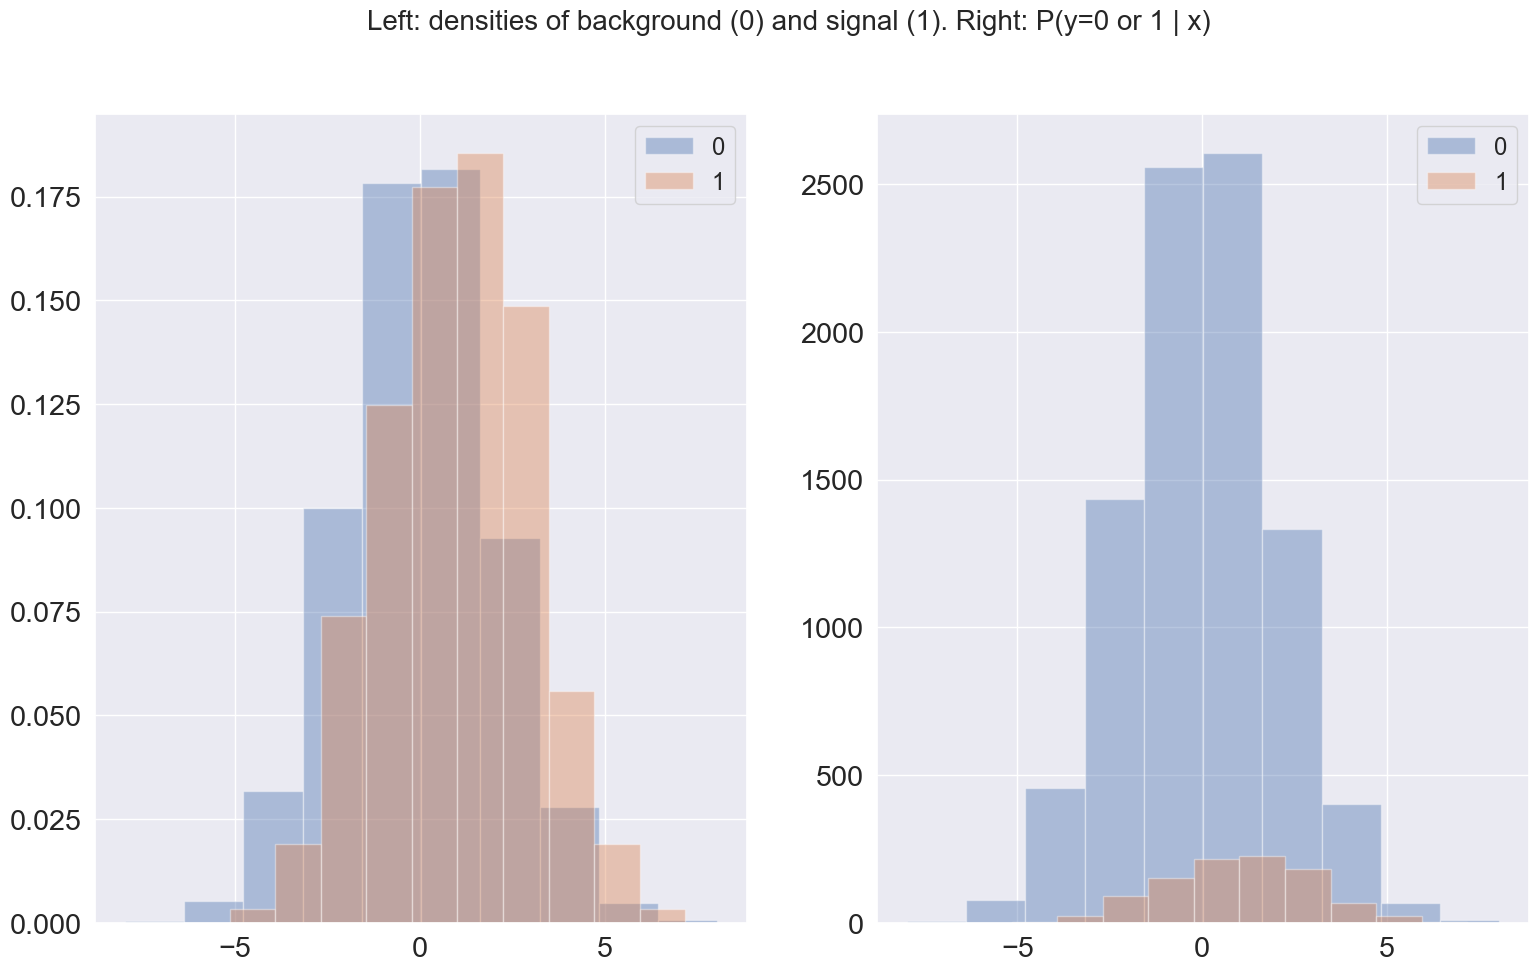

In [3]:
generator = toy1D()
x, y = generator.draw_sample()
generator.describe_sample()
generator.show_sample()

==> toy1D set_mu_alpha: mu= 1.00, alpha= 2.00
Expected number of signals mu*gamma=1000.00
Expected number of samples nu=mu*gamma+beta=10000.00
Proba of signal p_s= 0.10
Proba of background p_b= 0.90
Actual number of samples n=9956
Number of signal events n_s=990
Number of background events n_b=8966


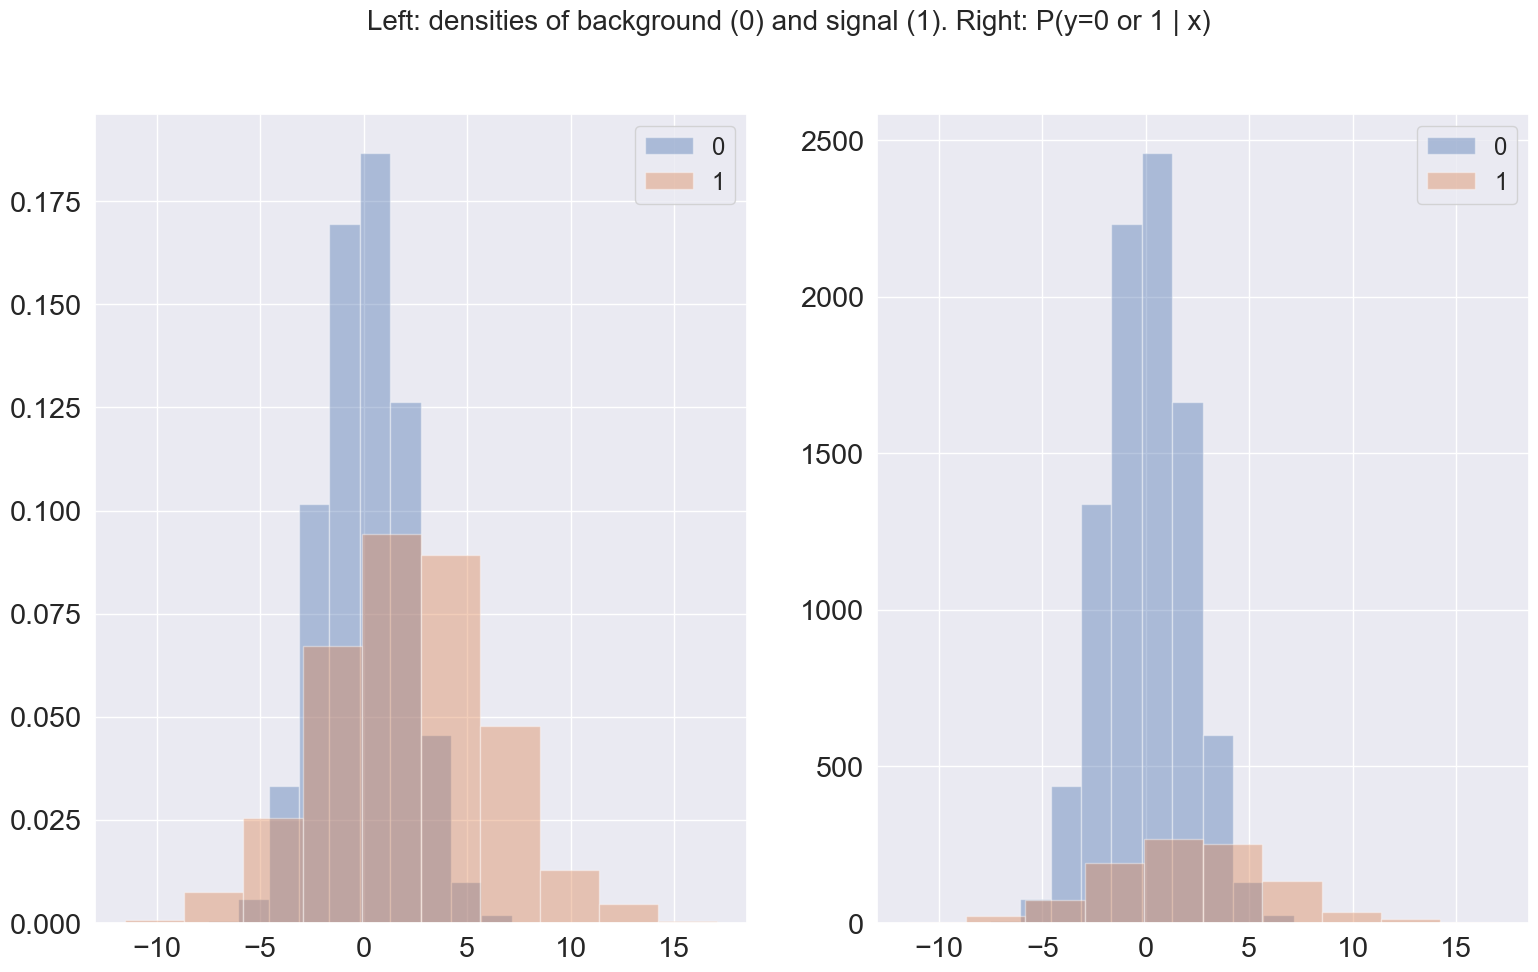

In [4]:
generator.set_mu_alpha(mu=1, alpha=2)
x, y = generator.draw_sample()
generator.describe_sample()
generator.show_sample()

## Simple counting estimator, no systematics

In [5]:
def basic_counting_estimator(x, beta, gamma):
    # This estimator does not depend on alpha
    n = x.shape[0]
    mu_hat = (n - beta)/ gamma
    sigma_mu_hat_2 = (mu_hat * gamma + beta) / gamma**2
    return (mu_hat, sigma_mu_hat_2)

In [6]:
# By default mu=alpha=1 (nominal values)
generator = toy1D()
# Use the generator as the "world" and get an unlabeled sample
generator.set_mu_alpha(mu=2, alpha=0.1)
x, _ = generator.draw_sample()
# Use the generator as the simulator and get beta and gamma
beta, gamma = generator.get_beta_gamma()
# Get the estimation
mu_hat, sigma_mu_hat_2 = basic_counting_estimator(x, beta, gamma)
print("[+] DONE: mu_hat =%5.2f +-%5.2f  " % (mu_hat, np.sqrt(sigma_mu_hat_2)))


==> toy1D parameters: pi= 0.10, sigma_x= 2.00, nu1=10000
Expected number of backgrounds beta=9000.00
Expected number of signals (nominal) gamma=1000.00
==> toy1D set_mu_alpha: mu= 1.00, alpha= 1.00
Expected number of signals mu*gamma=1000.00
Expected number of samples nu=mu*gamma+beta=10000.00
Proba of signal p_s= 0.10
Proba of background p_b= 0.90
==> toy1D set_mu_alpha: mu= 2.00, alpha= 0.10
Expected number of signals mu*gamma=2000.00
Expected number of samples nu=mu*gamma+beta=11000.00
Proba of signal p_s= 0.18
Proba of background p_b= 0.82
[+] DONE: mu_hat = 1.97 +- 0.10  


## Code to create systematic experiments

In [7]:
class Estimator:
    '''This class mocks up the code submitted by the participants. It instantiates its own generator.'''
    def __init__(self, generator, verbose = True):
        self.verbose = verbose
        if self.verbose:
            print("\n*** Estimator: New generator ***")
        self.gene = generator()
        self.beta = 0
        self.gamma = 0
        
    def fit(self):
        # Here we do simply estimate beta and gamma
        # To that end, we could call the generator and generate a large number of points
        # We just assume they are made available as known contant of physics
        self.beta, self.gamma = self.gene.get_beta_gamma()
        if self.verbose:
            print("Estimator: beta = %5.2f, gamma = %5.2f" % (self.beta, self.gamma))
        return self
        
    def predict(self, x):
        # We assume beta and gamma have been estimated 
        mu_hat, s2_hat = basic_counting_estimator(x, self.beta, self.gamma)
        return (mu_hat, s2_hat)                   

In [8]:
class Experiment:
    '''This class mocks up the ingestion and scoring programs.'''
    def __init__(self, estimator, generator=toy1D,
                 repeat_num=100, mu_val=[.1, 1, 2], alpha_val=[.1, 1, 2], verbose = True):
        ''' generator is an object of type generator; estimator is a function.'''
        self.verbose = verbose
        if self.verbose:
            print("\n*** Experiment: New generator ***")
        self.gene = generator()
        self.estim = estimator(generator) # The estimator instanciates its own generator
        self.repeat_num = repeat_num
        self.mu_val =  mu_val
        self.alpha_val =  alpha_val
        n_mu = len(mu_val)
        n_alpha = len(alpha_val)
        # Results:
        self.mu_hat = np.zeros((n_mu, n_alpha, repeat_num))
        self.s2_hat = np.zeros((n_mu, n_alpha, repeat_num))
        self.mu_ave = np.zeros((n_mu, n_alpha))
        self.s2_ave = np.zeros((n_mu, n_alpha))
        self.mu_MSE = np.zeros((n_mu, n_alpha))
        self.mu_CV = np.zeros((n_mu, n_alpha)) # Coefficient of variation
        self.s2_MSE = np.zeros((n_mu, n_alpha))
        self.s2_CV = np.zeros((n_mu, n_alpha))
        
    def run_ingestion(self):
        if self.verbose:
            print("\nExperiment: Ingestion program")
            print("\nTraining")
        self.estim = self.estim.fit()
        if self.verbose:
            print("\nTesting")        
        u=-1
        for mu in self.mu_val: # LOOP OVER MU
            u=u+1
            v=-1
            for alpha in self.alpha_val: # LOOP OVER ALPHA
                v=v+1
                # Set the parameters of the generator
                self.gene.set_mu_alpha(mu, alpha)
                mu_hat = np.zeros((self.repeat_num)) # The parameter to estimate
                s2_hat = np.zeros((self.repeat_num)) # The estimated CI
                
                for i in range(self.repeat_num): # LOOP OVER REPEATS
                    # Use the generator as the "world" and get an unlabeled sample
                    x, _ = self.gene.draw_sample()
                    # Get the estimation, run by the organizers
                    # This estmation will not be good because our baseline method
                    # does not take alpha into consideration
                    mu_hat[i], s2_hat[i] = self.estim.predict(x) 
                self.mu_hat[u, v,] = mu_hat
                self.s2_hat[u, v,] = s2_hat
                self.mu_ave[u, v] = np.mean(mu_hat)
                self.s2_ave[u, v] = np.mean(s2_hat)
                if self.verbose:
                    print("[+] mu_ave = %5.2f; s2_ave = %5.2f" % (self.mu_ave[u, v], self.s2_ave[u, v]))
                    
    def run_scoring(self):  
        if self.verbose:
            print("\nScoring program")
        u=-1
        for mu in self.mu_val: # LOOP OVER MU
            u=u+1
            if self.verbose:
                print("\n[+] mu = %5.2f" % mu)
            v=-1
            for alpha in self.alpha_val: # LOOP OVER ALPHA
                v=v+1
                if self.verbose:
                    print("[+]   alpha = %5.2f" % alpha)
                # mu_MSE is the ground truth of the variance of mu_hat, computed using the (unknown) value of mu
                # mu_MSE serves are metric to evaluate the mu_hat predictions, and as ground truth of the error bar
                mu_hat = self.mu_hat[u, v,]
                self.mu_MSE[u, v] = np.mean((mu_hat - mu)**2)
                # Coefficient of variation sigma/mu
                self.mu_CV[u, v] = np.sqrt(self.mu_MSE[u, v])/mu
                if self.verbose:
                    print("      mu_MSE = %5.2f; mu_CV = %5.2f" % (self.mu_MSE[u, v], self.mu_CV[u, v]))
                # s2_hat is the estimated variance of mu_hat provided by the participant
                # Thus s2_ave should have smilar values to mu_mse, if the partcipant did a good job
                # It could be done using the profile likelihood
                # In this toy example it is calculated in closed form without taking alpha into account
                # s2_MSE serves are metric to evaluate the s2_hat predictions
                s2_hat = self.s2_hat[u, v,]
                s2 = self.mu_MSE[u, v]
                self.s2_MSE[u, v] = np.mean((s2_hat - s2)**2)
                self.s2_CV[u, v] = np.sqrt(self.s2_MSE[u, v])/s2 
                if self.verbose:
                    print("s2_MSE = %5.2f; s2_CV = %5.2f" % (self.s2_MSE[u, v], self.s2_CV[u, v]))
                    
    def detailed_resu(self):
        fig, axs = plt.subplots(3, 2)
        fig.set_figheight(30)
        fig.set_figwidth(20)
        df = pd.DataFrame(self.mu_ave, index=self.mu_val, columns=self.alpha_val)
        g = sns.heatmap(df, annot=True, fmt="5.2f", ax=axs[0,0])
        g.set_title("$\hat{\mu}$ averaged over repeats")
        g.set_xlabel("alpha")
        g.set_ylabel("mu")
        df = pd.DataFrame(self.s2_ave, index=self.mu_val, columns=self.alpha_val)
        g = sns.heatmap(df, annot=True, fmt="5.2f", ax=axs[0,1])
        g.set_title("$\hat{\sigma}^2_{\hat{\mu}}$ averaged over repeats")
        g.set_xlabel("alpha")
        g.set_ylabel("mu")
        df = pd.DataFrame(self.mu_MSE, index=self.mu_val, columns=self.alpha_val)
        g = sns.heatmap(df, annot=True, fmt="5.2f", ax=axs[1,0])
        g.set_title("$\hat{\mu}$ MSE")
        g.set_xlabel("alpha")
        g.set_ylabel("mu")
        df = pd.DataFrame(self.s2_MSE, index=self.mu_val, columns=self.alpha_val)
        g = sns.heatmap(df, annot=True, fmt="5.2f", ax=axs[1,1])
        g.set_title("$\hat{\sigma}^2_{\hat{\mu}}$ MSE")
        g.set_xlabel("alpha")
        g.set_ylabel("mu")    
        df = pd.DataFrame(self.mu_CV, index=self.mu_val, columns=self.alpha_val)
        g = sns.heatmap(df, annot=True, fmt="5.2f", ax=axs[2,0])
        g.set_title("$\hat{\mu}$ Coeff. of variation")
        g.set_xlabel("alpha")
        g.set_ylabel("mu")
        df = pd.DataFrame(self.s2_CV, index=self.mu_val, columns=self.alpha_val)
        g = sns.heatmap(df, annot=True, fmt="5.2f", ax=axs[2,1])
        g.set_title("$\hat{\sigma}^2_{\hat{\mu}}$ Coeff. of variation")
        g.set_xlabel("alpha")
        g.set_ylabel("mu")    


*** Experiment: New generator ***

==> toy1D parameters: pi= 0.10, sigma_x= 2.00, nu1=10000
Expected number of backgrounds beta=9000.00
Expected number of signals (nominal) gamma=1000.00
==> toy1D set_mu_alpha: mu= 1.00, alpha= 1.00
Expected number of signals mu*gamma=1000.00
Expected number of samples nu=mu*gamma+beta=10000.00
Proba of signal p_s= 0.10
Proba of background p_b= 0.90

*** Estimator: New generator ***

==> toy1D parameters: pi= 0.10, sigma_x= 2.00, nu1=10000
Expected number of backgrounds beta=9000.00
Expected number of signals (nominal) gamma=1000.00
==> toy1D set_mu_alpha: mu= 1.00, alpha= 1.00
Expected number of signals mu*gamma=1000.00
Expected number of samples nu=mu*gamma+beta=10000.00
Proba of signal p_s= 0.10
Proba of background p_b= 0.90

Experiment: Ingestion program

Training
Estimator: beta = 9000.00, gamma = 1000.00

Testing
==> toy1D set_mu_alpha: mu= 0.10, alpha= 0.10
Expected number of signals mu*gamma=100.00
Expected number of samples nu=mu*gamma+beta=9

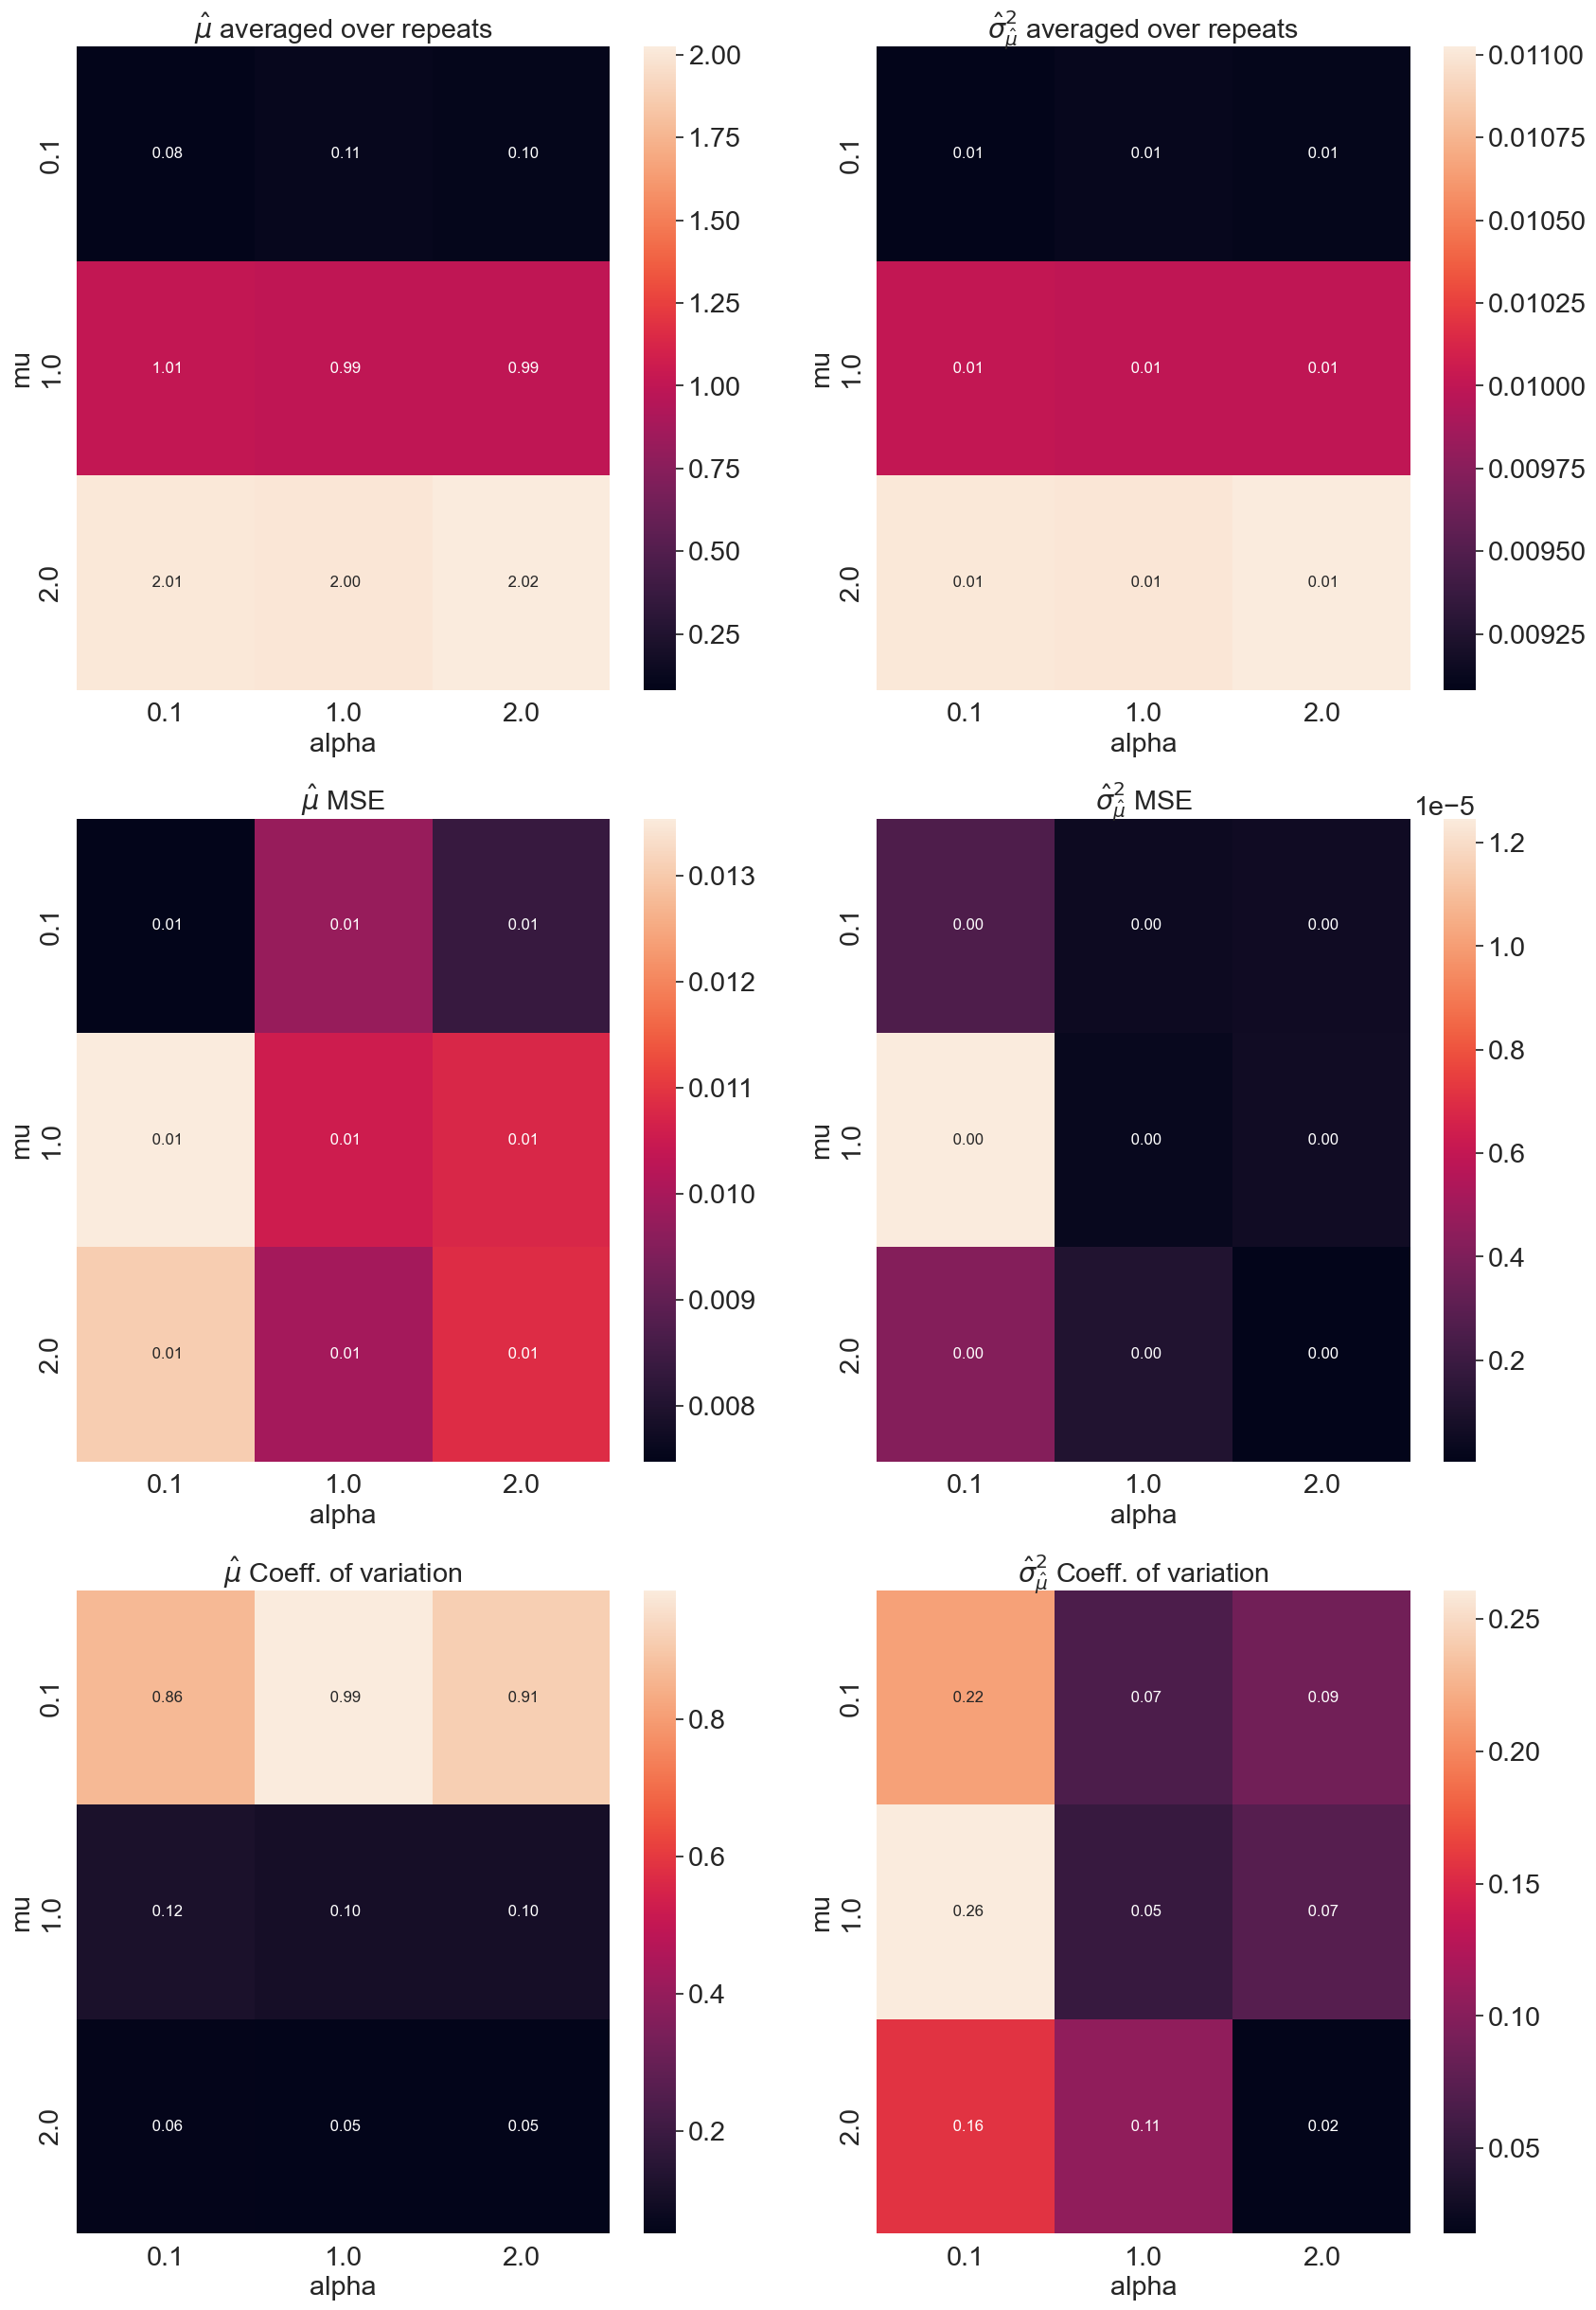

In [9]:
# This is what the ingestion program would do
expe = Experiment(Estimator)
expe.run_ingestion()
expe.run_scoring()
expe.detailed_resu()